In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [36]:
df=pd.read_csv('game_data.csv')
df.head()
df.drop('Days',axis=1, inplace=True)

In [38]:
x=df.drop('Wear Jacket?',axis=1)

In [40]:
y=df[['Wear Jacket?']]

In [42]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
from pandas.core.dtypes.common import is_numeric_dtype

In [52]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col]=le.fit_transform(x[col])

In [54]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


1.outlook(sunny=1,cloudy=0)
2.temparature(cold=0,warm=1)
3.routine(indoor=0,outdoor=1)

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x,y)

DecisionTreeClassifier()

In [62]:
dtc.predict([[0,0,1]])

/Library/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.75, '  False')]

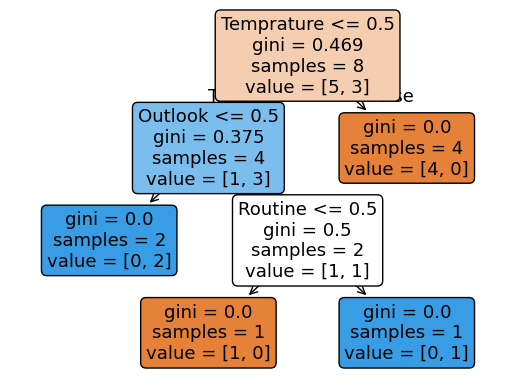

In [66]:
tree.plot_tree(dtc,rounded=True, filled=True,feature_names=x.columns)